In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

In [31]:
pos = np.genfromtxt("scratch/positions.out")
spins = np.genfromtxt("scratch/lattice.out")
x_magz = np.array([pos[:,0], spins[:,2]]).T


In [32]:
def tanh_model(xs, x0, delta, me):
    return me*np.tanh(np.pi*(xs-x0)/delta)

def fit_domain_wall(data):
    (fit_x0, fit_delta, fit_me), res = scipy.optimize.curve_fit(tanh_model, data[:,0], data[:,1], p0=[100, 20, 1])
    return (fit_x0, fit_delta, fit_me)

def get_width(temp, axis):
    prof_data = get_profile(temp, axis)
    scale = 2.47e-1 # 2.47 Angstrom
    (fit_x0, fit_delta, fit_me) = fit_domain_wall(prof_data)
    return fit_x0, fit_delta*scale, fit_me
    

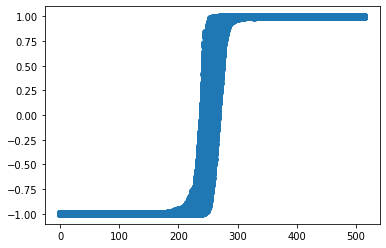

In [33]:
plt.scatter(x_magz[:,0], x_magz[:,1])

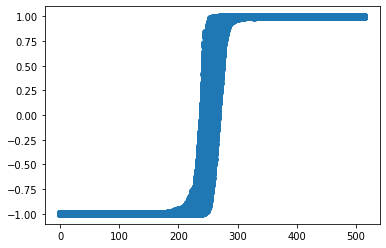

In [19]:
plt.scatter(x_magz[:,0], x_magz[:,1])

In [34]:
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(x_magz[:,0], x_magz[:,1], bins=200)


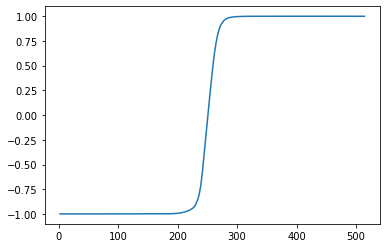

In [35]:
plt.plot(bin_edges[1:], bin_means)